# 🧼 Limpieza del set de datos 🧼

Primero, vamos a extraer las columnas que nos interesan para nuestro análisis.

In [2]:
import pandas as pd
import numpy as np

raw_df = pd.read_csv("files/hr_raw_data.csv", index_col=0)

pd.set_option("display.max_columns", None)

In [3]:
raw_df.head(3)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
0,51,No,NaN,2015.722222,NaN,6,3,NaN,1,1,1,0,NaN,3,5,resEArch DIREcToR,3,NaN,"16280,83$","42330,17$",7,Y,No,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,NaN,15,15,"16280,83$",1972,"195370,00$",NaN,NaN,Yes
1,52,No,NaN,2063.388889,NaN,1,4,Life Sciences,1,2,3,0,NaN,2,5,ManAGeR,3,NaN,NaN,"43331,17$",0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,NaN,1971,"199990,00$",NaN,NaN,1
2,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,1,3,3,0,NaN,3,5,ManaGER,4,Married,NaN,"41669,33$",1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,NaN,1981,"192320,00$",ManaGER - Research & Development,NaN,1


In [4]:
raw_df.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction',
       'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'over18', 'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager', 'sameasmonthlyincome', 'datebirth', 'salary',
       'roledepartament', 'numberchildren', 'remotework'],
      dtype='object')

Columna jobrole: 

Sales Executive               381

Research Scientist            325

Laboratory Technician         289

Manufacturing Director        168

Healthcare Representative     155

Manager                       115

Sales Representative           96

Research Director              90

Human Resources                59

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='yearswithcurrmanager', ylabel='yearssincelastpromotion'>

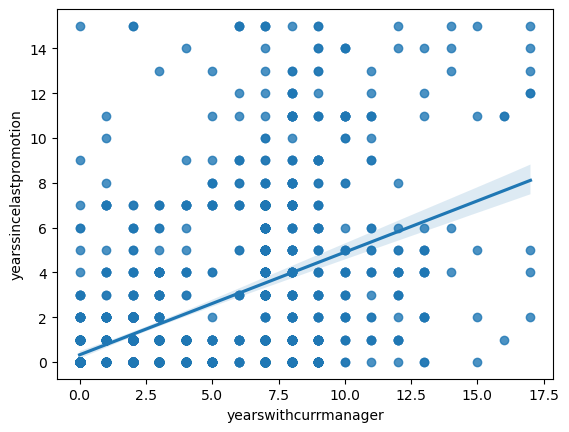

In [6]:
sns.regplot(x= 'yearswithcurrmanager',
                y = 'yearssincelastpromotion', 
                data = raw_df)

In [7]:
df = pd.DataFrame()

columns_to_import = ["employeenumber","datebirth", "remotework", "education", "gender", "stockoptionlevel", 
                     "percentsalaryhike", "salary", "monthlyincome", "joblevel", "jobrole", "relationshipsatisfaction", 
                     "environmentsatisfaction", "jobsatisfaction", "yearssincelastpromotion", "yearswithcurrmanager"]

for col in columns_to_import:
    df[col] = raw_df[col] 

In [8]:
df.head()

,employeenumber,datebirth,remotework,education,gender,stockoptionlevel,percentsalaryhike,salary,monthlyincome,joblevel,jobrole,relationshipsatisfaction,environmentsatisfaction,jobsatisfaction,yearssincelastpromotion,yearswithcurrmanager
0,1,1972,Yes,3,0,0,13,"195370,00$","16280,83$",5,resEArch DIREcToR,3,1,3,15,15
1,2,1971,1,4,0,1,14,"199990,00$",NaN,5,ManAGeR,1,3,3,11,9
2,3,1981,1,2,0,0,11,"192320,00$",NaN,5,ManaGER,4,3,4,11,15
3,4,1976,False,4,1,2,19,"171690,00$","14307,50$",4,ReseArCH DIrECtOr,2,1,3,5,6
4,5,1977,0,3,1,1,12,NaN,"12783,92$",4,sAleS EXECUtIve,4,1,1,2,8


## Limpiando las columnas elegidas

Primero, quitar duplicados

In [9]:
df.duplicated().sum()

64

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

Gender: cambiar 1 y 0 por Female y Male.

In [12]:
df['gender'] = df['gender'].map({0: 'F', 1: 'M'})

In [13]:
df['gender'].unique()

array(['F', 'M'], dtype=object)

Remote work: unificar valores

In [14]:
df['remotework'] = df['remotework'].astype(str).str.lower()
df['remotework'] = df['remotework'].replace({
                   'true': 'yes', 'false': 'no', 
                   '1': 'yes', '0': 'no'})

In [15]:
df['remotework'].unique()

array(['yes', 'no'], dtype=object)

Salary y Monthly income: Quitar símbolos y pasarlo a float.

In [16]:
def clean_money(*args):
    resultados = []
    for dato in args:
        try:
            resultados.append(float(dato.replace('$', '').replace(',', '.')))
        except: 
            resultados.append(np.nan)
    return resultados if len(resultados) > 1 else resultados[0]

In [17]:
df[["monthlyincome","salary"]] = df.apply(lambda x: clean_money(x["monthlyincome"], x["salary"]), axis=1, result_type="expand")

In [18]:
df[["monthlyincome","salary"]]

,monthlyincome,salary
0,16280.83,195370.00
1,NaN,199990.00
2,NaN,192320.00
3,14307.50,171690.00
4,12783.92,NaN
...,...,...
1609,8604.17,103250.00
1610,3705.83,44470.00
1611,NaN,100071.84
1612,4492.84,53914.11


Jobrole: ponerlo todo lower case.

In [19]:
df['jobrole'] = df['jobrole'].str.strip().str.replace(" ", "_").str.lower()

In [20]:
df['jobrole']

0            research_director
1                      manager
2                      manager
3            research_director
4              sales_executive
                 ...          
1609           sales_executive
1610     laboratory_technician
1611           sales_executive
1612           sales_executive
1613    manufacturing_director
Name: jobrole, Length: 1614, dtype: object

## Nulos en Salary

Como tenemos monthltincome podemos obtener salary multiplicándolo por 12.

In [21]:
df["salary"].describe()

count      1340.000000
mean      65245.875313
std       45933.029687
min       10090.000000
25%       28111.130000
50%       53914.110000
75%       94607.500000
max      199990.000000
Name: salary, dtype: float64

In [22]:
df[["monthlyincome", "salary"]].isna().sum()

monthlyincome    468
salary           274
dtype: int64

In [23]:
df["salary_from_month"] = df["monthlyincome"]*12 

In [24]:
df[["salary", "salary_from_month"]]

,salary,salary_from_month
0,195370.00,195369.96
1,199990.00,NaN
2,192320.00,NaN
3,171690.00,171690.00
4,NaN,153407.04
...,...,...
1609,103250.00,103250.04
1610,44470.00,44469.96
1611,100071.84,NaN
1612,53914.11,53914.08


In [25]:
df['salary'] = df['salary'].fillna(df['salary_from_month'])

In [26]:
df['salary'].isna().sum()

0

["employeenumber","datebirth", "remotework", "education", "gender", "stockoptionlevel", 
                     "percentsalaryhike", "salary", "monthlyincome", "joblevel", "jobrole", "relationshipsatisfaction", 
                     "environmentsatisfaction", "jobsatisfaction", "yearssincelastpromotion", "yearswithcurrmanager"]


objetivo final :en la pregunta de los empleado estan satisfechos??? 

nos centramos en si la empresa es igualitaria

PREGUNTAS FINALES: 
 vamos a separarlo entre género y edad:
  
  GÉNERO 

 -hay repartición equitativa entre el género en la empresa? --> "gender"

 -gana más quién tiene más educación? más hombre o mujer? --> "gender", "education"
 
 -están más satifechos los hombres o las mujeres? en base a salario, ambiente o rango? --> "salary", "gender", "environmentsatisfaction", "joblevel", "jobrole"

 EDAD

 -cómo es la distribución de edades los empleados? --> "datebirth"

 -gana más quién tiene más educación? según edad --> "datebirth", "education"

 -están más satifechos segun edades? en base a salario, ambiente o rango? --> "salary", "datebirth", "environmentsatisfaction", "joblevel", "jobrole"


Fase 3: Visualizando los datos.

In [27]:
df.head()

,employeenumber,datebirth,remotework,education,gender,stockoptionlevel,percentsalaryhike,salary,monthlyincome,joblevel,jobrole,relationshipsatisfaction,environmentsatisfaction,jobsatisfaction,yearssincelastpromotion,yearswithcurrmanager,salary_from_month
0,1,1972,yes,3,F,0,13,195370.00,16280.83,5,research_director,3,1,3,15,15,195369.96
1,2,1971,yes,4,F,1,14,199990.00,NaN,5,manager,1,3,3,11,9,NaN
2,3,1981,yes,2,F,0,11,192320.00,NaN,5,manager,4,3,4,11,15,NaN
3,4,1976,no,4,M,2,19,171690.00,14307.50,4,research_director,2,1,3,5,6,171690.00
4,5,1977,no,3,M,1,12,153407.04,12783.92,4,sales_executive,4,1,1,2,8,153407.04


In [28]:
#actualizar edades. CREACIÓN COLUMNA 

df["age_2025"] = 2025 - df["datebirth"] 
df["age_2025"] 

0       53
1       54
2       44
3       49
4       48
        ..
1609    38
1610    47
1611    41
1612    38
1613    48
Name: age_2025, Length: 1614, dtype: int64

In [29]:
df.head()

,employeenumber,datebirth,remotework,education,gender,stockoptionlevel,percentsalaryhike,salary,monthlyincome,joblevel,jobrole,relationshipsatisfaction,environmentsatisfaction,jobsatisfaction,yearssincelastpromotion,yearswithcurrmanager,salary_from_month,age_2025
0,1,1972,yes,3,F,0,13,195370.00,16280.83,5,research_director,3,1,3,15,15,195369.96,53
1,2,1971,yes,4,F,1,14,199990.00,NaN,5,manager,1,3,3,11,9,NaN,54
2,3,1981,yes,2,F,0,11,192320.00,NaN,5,manager,4,3,4,11,15,NaN,44
3,4,1976,no,4,M,2,19,171690.00,14307.50,4,research_director,2,1,3,5,6,171690.00,49
4,5,1977,no,3,M,1,12,153407.04,12783.92,4,sales_executive,4,1,1,2,8,153407.04,48


<Axes: xlabel='age_2025', ylabel='Count'>

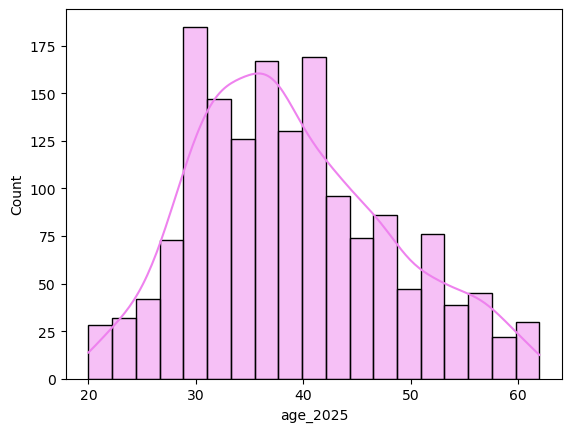

In [30]:
# -cómo es la distribución de edades los empleados? --> "datebirth"

sns.histplot(x = "age_2025", 
             data = df, 
             color = "violet", 
             kde = True)

Vamos a hacer división generacional:

Generación Baby Boomers (nacidos entre 1945 y 1964)

Generación X (nacidos entre 1965 y 1981)

Generación Y o Millennials (nacidos entre 1982 y 1994)

Generación Z o Centennials (nacidos entre 1995 y 2009)

In [31]:
#-gana más quién tiene más educación? según edad --> "datebirth", "education"
df["age_2025"].describe().T.reset_index()


,index,age_2025
0,count,1614.000000
1,mean,38.923792
2,std,9.101332
3,min,20.000000
4,25%,32.000000
5,50%,38.000000
6,75%,45.000000
7,max,62.000000


In [32]:
def asignacion_generacion(datebirth):
    if datebirth >= 1995:
        return 'Gen Z'
    elif datebirth >=1981:
        return 'Millennial'
    elif datebirth >=1965:
        return 'Gen X'
    else:
        return 'Baby Boomer'
    
df["generation"] = df['datebirth'].apply(asignacion_generacion)
display(df)


,employeenumber,datebirth,remotework,education,gender,stockoptionlevel,percentsalaryhike,salary,monthlyincome,joblevel,jobrole,relationshipsatisfaction,environmentsatisfaction,jobsatisfaction,yearssincelastpromotion,yearswithcurrmanager,salary_from_month,age_2025,generation
0,1,1972,yes,3,F,0,13,195370.00,16280.83,5,research_director,3,1,3,15,15,195369.96,53,Gen X
1,2,1971,yes,4,F,1,14,199990.00,NaN,5,manager,1,3,3,11,9,NaN,54,Gen X
2,3,1981,yes,2,F,0,11,192320.00,NaN,5,manager,4,3,4,11,15,NaN,44,Millennial
3,4,1976,no,4,M,2,19,171690.00,14307.50,4,research_director,2,1,3,5,6,171690.00,49,Gen X
4,5,1977,no,3,M,1,12,153407.04,12783.92,4,sales_executive,4,1,1,2,8,153407.04,48,Gen X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,1610,1987,no,1,F,1,11,103250.00,8604.17,3,sales_executive,1,3,4,3,7,103250.04,38,Millennial
1610,1611,1978,yes,2,F,0,12,44470.00,3705.83,2,laboratory_technician,2,3,2,0,8,44469.96,47,Gen X
1611,1612,1984,yes,5,F,0,18,100071.84,NaN,3,sales_executive,4,13,3,0,7,NaN,41,Millennial
1612,1613,1987,yes,4,F,2,13,53914.11,4492.84,2,sales_executive,4,1,4,0,7,53914.08,38,Millennial


COMPROBACIÓN FUNCIÓN

In [33]:
asignacion_generacion(1993)

'Millennial'

In [34]:
asignacion_generacion(1985)

'Millennial'

In [35]:
asignacion_generacion(1955)

'Baby Boomer'

In [36]:
asignacion_generacion(2009)


'Gen Z'

In [37]:
df_generation = df.groupby('generation')['age_2025'].describe()

df_generation

,count,mean,std,min,25%,50%,75%,max
generation,,,,,,,,
Baby Boomer,15.0,61.333333,0.487950,61.0,61.0,61.0,62.0,62.0
Gen X,404.0,50.905941,4.425963,45.0,47.0,50.0,55.0,60.0
Gen Z,282.0,26.925532,2.807867,20.0,25.0,28.0,29.0,30.0
Millennial,913.0,36.959474,3.896059,31.0,34.0,37.0,40.0,44.0


C:\Users\maria\AppData\Local\Temp\ipykernel_19124\46511456.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='generation', data=df, palette='mako', order = ["Millennial", "Gen X", "Gen Z", "Baby Boomer"] )


<Axes: xlabel='generation', ylabel='count'>

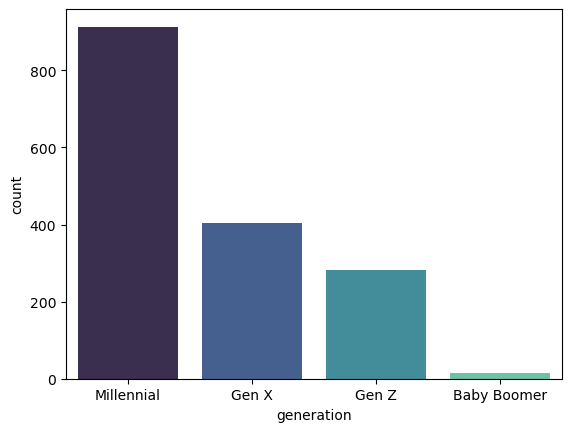

In [38]:
#vamos a hacer un countplot

sns.countplot(x='generation', data=df, palette='mako', order = ["Millennial", "Gen X", "Gen Z", "Baby Boomer"] )

Vemos que no es inclusiva. La mayoria son millenials. Pocos baby boomer porque muchos seguro se jubilan. pero no es algo particular de la empresa sino que es algo general del mercado laboral, le grueso de la poblacionm activa se concentra enm millenials

In [39]:
conteo = df['generation'].value_counts()



In [40]:
df_pie = df.groupby("generation")["employeenumber"].count().reset_index()

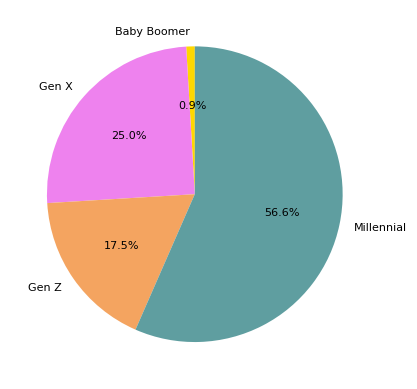

In [41]:
colores = ["gold", "violet", "sandybrown", "cadetblue"]

# creamos el gráfico basándonos en el DataFrame que hemos creado en el paso anterior
plt.pie("employeenumber", labels= "generation",
        data = df_pie, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 8}, 
        startangle=90);

In [42]:
# -están más satifechos segun edades? en base a salario, ambiente o rango? --> "salary", "datebirth", "environmentsatisfaction", "joblevel", "jobrole"

In [43]:
df_california = pd.read_csv("labor_force_participation_rate_by_age_group.csv")

pd.set_option("display.max_columns", None)

df_california

,Area Type,Area Name,Date,Year,Month,Age 16-19,Age 20-24,Age 25-34,Age 35-44,Age 45-54,Age 55-64,Age 65+
0,State,California,2/1/2008,2008,February,0.358,0.724,0.816,0.816,0.811,0.651,0.146
1,State,California,3/1/2008,2008,March,0.354,0.722,0.816,0.817,0.811,0.653,0.147
2,State,California,4/1/2008,2008,April,0.349,0.722,0.815,0.818,0.812,0.655,0.149
3,State,California,5/1/2008,2008,May,0.347,0.722,0.816,0.820,0.811,0.655,0.150
4,State,California,6/1/2008,2008,June,0.344,0.721,0.816,0.822,0.810,0.654,0.153
...,...,...,...,...,...,...,...,...,...,...,...,...
200,State,California,10/1/2024,2024,October,0.287,0.682,0.816,0.836,0.801,0.649,0.186
201,State,California,11/1/2024,2024,November,0.282,0.685,0.816,0.837,0.802,0.647,0.186
202,State,California,12/1/2024,2024,December,0.278,0.689,0.817,0.838,0.803,0.646,0.186
203,State,California,1/1/2025,2025,January,0.274,0.689,0.818,0.838,0.803,0.646,0.187


Mirar el DataFrame original para verificar el año del archivo

In [44]:
df_2023_calif=df_california[df_california["Year"]==2023]

In [45]:
df_2023_calif.select_dtypes( exclude="O").describe().T

,count,mean,std,min,25%,50%,75%,max
Year,12.0,2023.000000,0.000000,2023.000,2023.00000,2023.000,2023.00000,2023.000
Age 16-19,12.0,0.278000,0.007422,0.267,0.27150,0.278,0.28525,0.288
Age 20-24,12.0,0.660417,0.005567,0.655,0.65600,0.658,0.66575,0.669
Age 25-34,12.0,0.816583,0.003919,0.811,0.81300,0.817,0.82025,0.822
Age 35-44,12.0,0.818667,0.002270,0.814,0.81775,0.819,0.82025,0.822
Age 45-54,12.0,0.801917,0.002193,0.800,0.80075,0.801,0.80250,0.806
Age 55-64,12.0,0.653000,0.001044,0.652,0.65200,0.653,0.65300,0.655
Age 65+,12.0,0.191000,0.002374,0.186,0.19075,0.191,0.19200,0.195


#gana mas quién tiene mas educacion según edad

In [46]:
df.head()

,employeenumber,datebirth,remotework,education,gender,stockoptionlevel,percentsalaryhike,salary,monthlyincome,joblevel,jobrole,relationshipsatisfaction,environmentsatisfaction,jobsatisfaction,yearssincelastpromotion,yearswithcurrmanager,salary_from_month,age_2025,generation
0,1,1972,yes,3,F,0,13,195370.00,16280.83,5,research_director,3,1,3,15,15,195369.96,53,Gen X
1,2,1971,yes,4,F,1,14,199990.00,NaN,5,manager,1,3,3,11,9,NaN,54,Gen X
2,3,1981,yes,2,F,0,11,192320.00,NaN,5,manager,4,3,4,11,15,NaN,44,Millennial
3,4,1976,no,4,M,2,19,171690.00,14307.50,4,research_director,2,1,3,5,6,171690.00,49,Gen X
4,5,1977,no,3,M,1,12,153407.04,12783.92,4,sales_executive,4,1,1,2,8,153407.04,48,Gen X


In [47]:
df[["salary","education","generation"]]

,salary,education,generation
0,195370.00,3,Gen X
1,199990.00,4,Gen X
2,192320.00,2,Millennial
3,171690.00,4,Gen X
4,153407.04,3,Gen X
...,...,...,...
1609,103250.00,1,Millennial
1610,44470.00,2,Gen X
1611,100071.84,5,Millennial
1612,53914.11,4,Millennial


HS
Associate’s
Bachelor’s
Master’s
Doctorate’s

In [48]:
df["education"]=pd.cut(df["education"], bins=5, labels=["HS", "Associate’s","Bachelor’s","Master’s","Doctorate’s"])

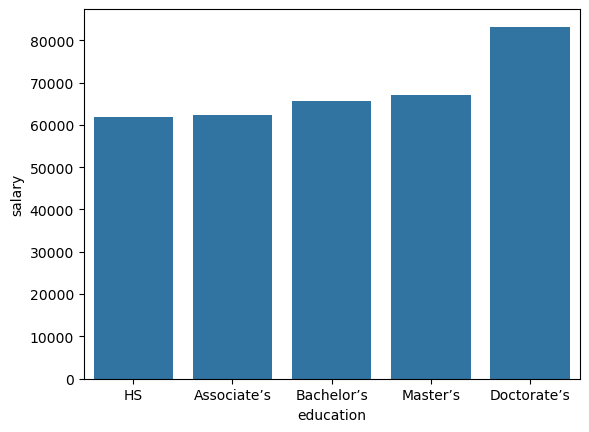

In [49]:
sns.barplot(x="education",y= "salary",data=df,errorbar=None);

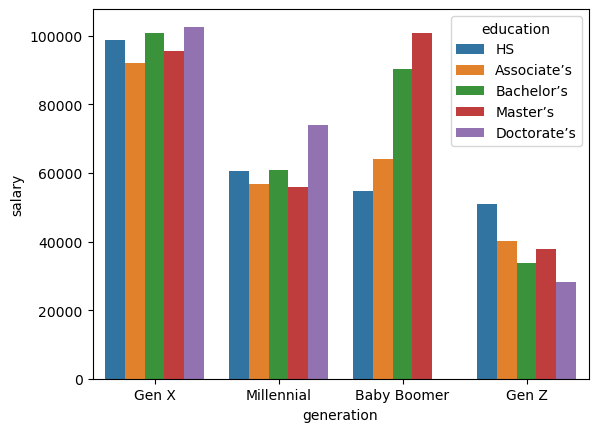

In [50]:
sns.barplot(x="generation",y= "salary",hue="education",data=df,errorbar=None);

C:\Users\maria\AppData\Local\Temp\ipykernel_19124\389531040.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df["salary_per"] = df.groupby("education")["salary"].transform(lambda x: x / x.sum())


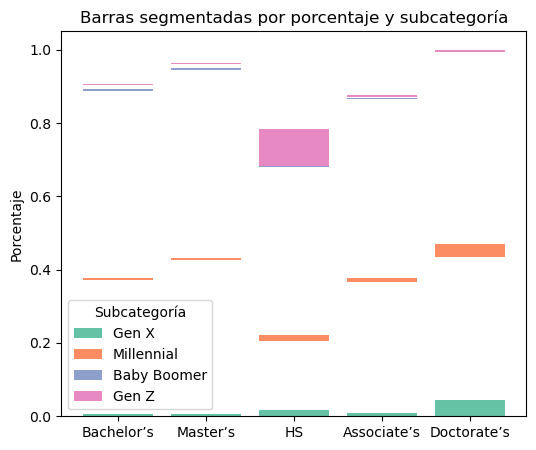

In [51]:


# Normalizar los valores para obtener porcentajes dentro de cada categoría
df["salary_per"] = df.groupby("education")["salary"].transform(lambda x: x / x.sum())

# Colores para cada subcategoría
colores = sns.color_palette("Set2", len(df["generation"].unique()))

# Crear la figura
fig, ax = plt.subplots(figsize=(6, 5))

# Apilar las barras usando plt.bar con acumulación (bottom)
bottom = {cat: 0 for cat in df["education"].unique()}  # Base inicial para cada categoría

for i, subcat in enumerate(df["generation"].unique()):
    subset = df[df["generation"] == subcat]  # Filtrar subcategoría
    ax.bar(subset["education"], subset["salary_per"], 
           bottom=[bottom[cat] for cat in subset["education"]], 
           color=colores[i], label=subcat)
    
    # Actualizar bottom para la siguiente capa de la barra
    for cat, val in zip(subset["education"], subset["salary_per"]):
        bottom[cat] += val

# Agregar etiquetas y leyenda
ax.set_ylabel("Porcentaje")
ax.set_title("Barras segmentadas por porcentaje y subcategoría")
ax.legend(title="Subcategoría")

plt.show()











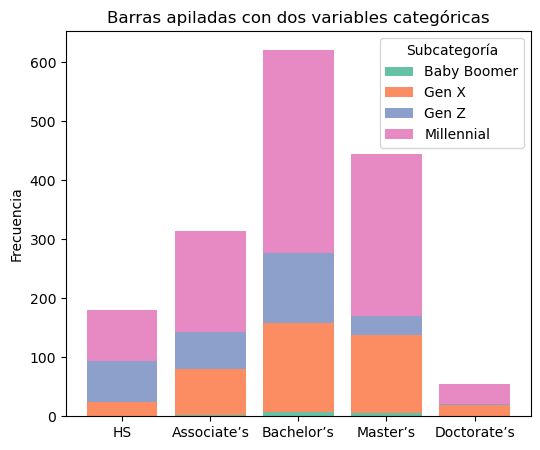

In [52]:
# Contar las ocurrencias de las combinaciones de 'categoria' y 'subcategoria'
count_data = pd.crosstab(df['education'], df['generation'])

# Crear la figura
fig, ax = plt.subplots(figsize=(6, 5))

# Apilar las barras usando plt.bar con bottom acumulado
bottom = np.zeros(len(count_data))  # Base inicial para cada categoría
colores = sns.color_palette("Set2", len(count_data.columns))  # Colores para cada subcategoría

# Para cada subcategoría, apilamos las barras
for i, col in enumerate(count_data.columns):
    ax.bar(count_data.index, count_data[col], bottom=bottom, color=colores[i], label=col)
    bottom += count_data[col]  # Acumulamos para la siguiente parte de la barra

# Agregar etiquetas y leyenda
ax.set_ylabel("Frecuencia")
ax.set_title("Barras apiladas con dos variables categóricas")
ax.legend(title="Subcategoría")

plt.show()